# Practical Example - Linear Regression

### 1. Purpose
> ***Predict the price*** of a used car depending on its specs

### 2. Data Profiling
- Possibly strong ***explanatory variables***: ```Brand```, ```Mileage```, ```EngineV```, ```Year```
- ***Target:*** ```Price```

### 3. Process 

| Events | Table |
| ----- | -----|
| [***read_csv***](#Loading-the-data) | raw_data | 
| [***drop column ```Model```***](#Determining-the-variables-of-interest---Drop-column(s)) | data | 
| [***drop N/A***](#Dealing-with-missing-values) | data_no_mv|
| [***remove 1% higest outliers from ```Price```***](#1.1-Dealing-with-outliers-in-Price) | data_1 |
| [***remove 1% highest outliers from ```Mileage```***](#2.1-Dealing-with-outliers-in-Mileage) | data_2 |
| [***remove abnormal value from ```EngineV```***](#3.1-Remove-abnormal-value-of-EngineV) | data_3 |
| [***remove 1% oldest cars from ```Year```***](#4.1-Remove-most-vintage-car) | data_4 |
| [***reset_index for data_4***](#Final-table-for-preprocessing-step) | data_cleaned |

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Turn all Matplotlib's graphs to Seaborn's

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')


## Loading the data

In [2]:
raw_data = pd.read_csv("C:/Users/baoph/OneDrive - Seneca/Documents/365 Data Science/Machine Learning/Linear Regression Practical Example (Part 1) Dataset/1.04. Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.shape

(4345, 9)

## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include= 'all') # include descriptives for category var too

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


##### Some Notes:
- ***Misssing value***: Look at count row. ```Price``` and ```EngineV``` seems to be missing some of values

- ***Unique entries*** of each ```cat var```: ***```Model```*** has ***312 unique entries***, which is **hard to implement*** the regression (It means we have more than ***300 dummies***) 

- Number of car has been register ***```Registration``` = 'yes'*** is ***significantly high*** (***90%*** total of entries - almost all of them) **--> Won't be useful**

- A lot of the information from ```Model``` could be engineered from ```Brand```, ```Year```, and ```EngineV``` --> **Won't be losing too much variability**


### Determining the variables of interest - Drop column(s)

In [5]:
data = raw_data.drop(['Model'], axis=1) # Drop [Model] column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
data.isnull().sum()/data.shape[0]*100 # % of missing values for each var

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

##### Rule of thumb:
> If you are ***removing <5% of the observations***, you are free to ust remove all that have Missing Value

In [7]:
data_no_mv = data.dropna(axis=0) # Drop N/A by row

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

#### 1. Distribution of ```Price```

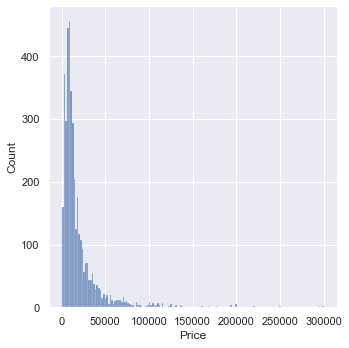

In [9]:
sns.displot(data_no_mv.Price) # Plot Price Distribution

##### Some Notes:

- ```Price``` has an ***exponential*** distribution

- For ***optimal results*** we would be looking for a ***normal distribution***

- We have a few ***outliers*** in ```Price``` --> **Remove the top 1% of observation**

#### 1.1 Dealing with outliers in ```Price```

In [10]:
q = data_no_mv.Price.quantile(0.99)
data_1 = data_no_mv[data_no_mv.Price < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


##### Some Notes:

- After removing outliers, the ***MAX(Price)*** is far away higher than the ***MEAN(Price)***, it is still acceptably closer

<AxesSubplot:xlabel='Price', ylabel='Density'>

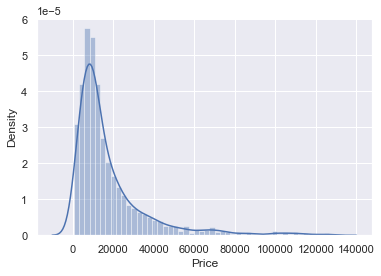

In [11]:
sns.distplot(data_1.Price)

#### 2. Distribution of ```Mileage```

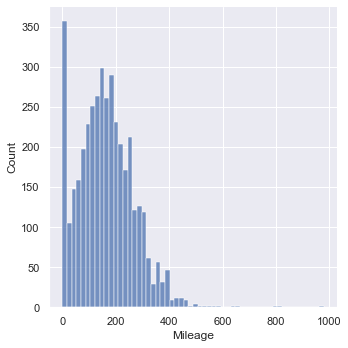

In [12]:
sns.displot(data_no_mv.Mileage) 

#### 2.1 Dealing with outliers in ```Mileage```

In [13]:
q_1 = data_1.Mileage.quantile(0.99)
data_2 = data_1[data_1.Mileage < q_1]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

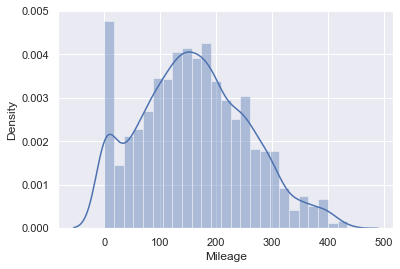

In [14]:
sns.distplot(data_2.Mileage)

#### 3. Distribution of ```EngineV```

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

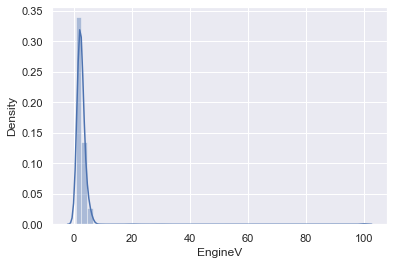

In [15]:
sns.distplot(data_no_mv.EngineV)

##### Some Notes: 

- Take a look at ```EngineV``` we see there is many ***strange*** value like ***99.99***. The interval of the ```EngineV``` normally low ***[0.6; 6.5]*** **--> 99.99 is incorrect entry** (That's a common way to label missing values)
**--> Chose the engine volumn below 6.5**

In [16]:
EngV = pd.DataFrame(raw_data.EngineV)
EngV = EngV.dropna(axis=0)
EngV.sort_values(by="EngineV")

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


#### 3.1 Remove abnormal value of ```EngineV```

In [17]:
data_3 = data_2[data_2.EngineV < 6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

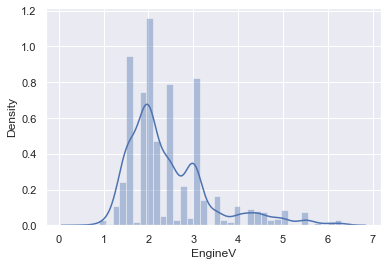

In [18]:
sns.distplot(data_3.EngineV)

#### 4. Distribution of ```Year```

<AxesSubplot:xlabel='Year', ylabel='Density'>

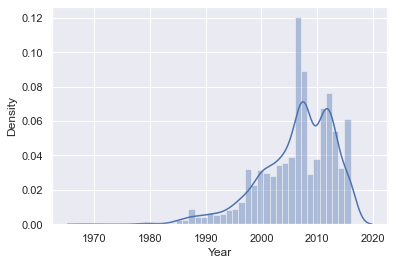

In [19]:
sns.distplot(data_3.Year)

#### 4.1 Remove most vintage car

In [20]:
q_3 = data_3.Year.quantile(0.01)
data_4 = data_3[data_3.Year>q_3]

<AxesSubplot:xlabel='Year', ylabel='Density'>

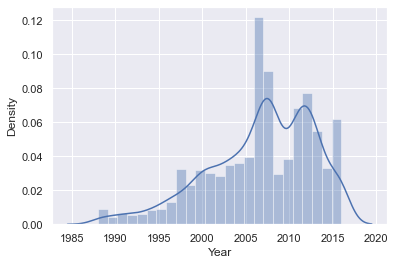

In [21]:
sns.distplot(data_4.Year)

In [22]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


### Final table for preprocessing step

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumption

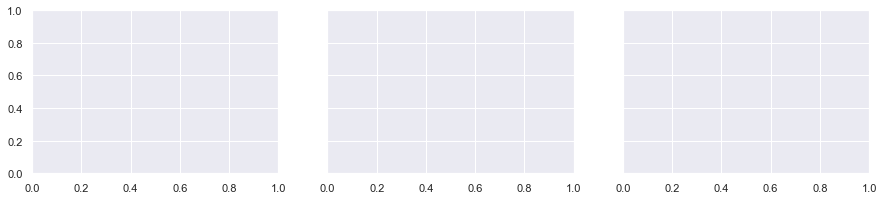

In [25]:
f, (ax1, ax2, ax2) = plt.subplots(1,3, sharey=True, figsize=(15,3))